<a href="https://colab.research.google.com/github/carolinampessoa/TechChallengeFase2/blob/main/TechChallengeFase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1) Definindo o problema**

O problema abordado neste trabalho consiste na alocação de tarefas a máquinas de forma a minimizar o tempo total de execução da máquina mais sobrecarregada, conhecido como makespan. Esse tipo de problema é clássico em contextos de escalonamento (scheduling) e balanceamento de carga, sendo comum em ambientes industriais, computacionais e logísticos.

Formalmente, temos um conjunto de 𝑛 tarefas, cada uma com um tempo de processamento associado, e um conjunto de 𝑚 máquinas idênticas. O objetivo é distribuir essas tarefas entre as máquinas de modo que o tempo total da máquina mais carregada seja o menor possível.

O problema é modelado com variáveis discretas e inteiras, pois cada tarefa deve ser atribuída a uma única máquina, representada por um número inteiro. Não há variáveis contínuas envolvidas. O espaço de busca é exponencial, uma vez que o número de possíveis alocações é $m^n$ de forma que sua complexidade cresce rapidamente com o aumento de tarefas ou máquinas.

A função a ser minimizada (o makespan) é uma função não linear e não diferenciável, pois depende do máximo dos tempos acumulados nas máquinas. Isso impede o uso direto de técnicas de otimização contínua baseadas em derivadas.

Cada tarefa deve ser atribuída a exatamente uma máquina. Não há restrições explícitas além da integridade da alocação.

O problema é classificado como np-hard, o que significa que não há algoritmo conhecido que o resolva em tempo polinomial para todos os casos.

##**2) Implementação do AG**

### 2.1) Importando bibiliotecas e definindo parâmetros iniciais

In [2]:
# Configurações Streamlit
!pip install streamlit pyngrok --quiet
!ngrok config add-authtoken 30mw8ddmcCbqD1w219CKzTNCku7_29ZDWq1BUQF3TdyhG4QSx

# Importação de bibliotecas
import random
import matplotlib.pyplot as plt
from pyngrok import ngrok

# Configurações iniciais do problema
NUM_TAREFAS = 1000
NUM_MAQUINAS = 20
TAMANHO_POPULACAO = 200
GERACOES = 200
TAXA_CROSSOVER = 0.7
TAXA_MUTACAO = 0.01

# Geração de tarefas aleatórias com tempo variando entre 1 e 15 minutos
tarefas = [random.randint(1, 15) for _ in range(NUM_TAREFAS)]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


### 2.2) Codificação do indivíduo

No problema proposto, um indivíduo é representado por um vetor de valores inteiros (codificação discreta), onde o valor do elemento i representa a máquina em que foi alocada a tarefa i.

In [3]:
# CRIAR UM INDIVÍDUO (alocação de tarefas em máquinas)
def criar_individuo():
    return [random.randint(0, NUM_MAQUINAS - 1) for _ in range(NUM_TAREFAS)]

Exemplo de indíviduo gerado:

In [4]:
print(criar_individuo())

[9, 15, 6, 17, 17, 15, 9, 9, 13, 5, 7, 4, 13, 17, 11, 18, 5, 14, 2, 5, 5, 4, 8, 19, 8, 12, 17, 3, 5, 15, 2, 19, 13, 13, 15, 12, 14, 6, 12, 8, 17, 17, 16, 12, 3, 1, 9, 4, 18, 15, 4, 3, 17, 11, 10, 15, 17, 1, 17, 11, 5, 7, 18, 11, 0, 13, 16, 4, 16, 11, 5, 12, 16, 15, 8, 2, 14, 0, 4, 16, 17, 1, 4, 10, 13, 13, 16, 1, 2, 10, 16, 16, 14, 4, 15, 15, 2, 1, 10, 10, 2, 16, 11, 9, 12, 5, 15, 2, 2, 15, 16, 14, 12, 13, 15, 13, 0, 0, 12, 14, 13, 19, 7, 17, 4, 3, 5, 16, 18, 3, 3, 14, 4, 16, 3, 1, 14, 9, 0, 6, 9, 7, 3, 7, 1, 9, 11, 1, 12, 7, 3, 19, 7, 1, 3, 7, 4, 6, 17, 3, 15, 14, 3, 9, 10, 9, 7, 15, 12, 2, 9, 3, 1, 19, 5, 17, 3, 7, 12, 11, 0, 1, 11, 10, 15, 7, 5, 10, 13, 11, 15, 12, 19, 4, 13, 16, 13, 19, 14, 15, 9, 9, 5, 7, 9, 16, 10, 17, 8, 10, 13, 17, 10, 1, 17, 2, 17, 5, 6, 15, 11, 2, 11, 0, 17, 12, 19, 16, 11, 14, 14, 17, 18, 4, 4, 8, 15, 2, 1, 0, 7, 8, 7, 9, 18, 5, 13, 17, 4, 1, 1, 13, 16, 18, 9, 17, 8, 9, 19, 16, 19, 11, 8, 1, 18, 15, 7, 9, 1, 13, 6, 19, 6, 6, 5, 18, 12, 5, 15, 2, 10, 10, 19, 

### 2.3) Função Fitness

A avaliação das soluções considerou dois critérios:

  1.   Makespan da máquina mais carregada, ou seja, o tempo máximo necessário para completar todas as atividades (considerando que todas máquinas rodam paralelamente);
  2.   Balanceamento dos recursos, ou seja, quão bem distribuídas as atividades estão ao longo das máquinas, de forma que não tenhamos nenhuma máquina ociosa ou engargalada demais.Para isso, avaliamos a variância dos tempos acumulados em cada máquina;

In [5]:

# AVALIAÇÃO CLÁSSICA (considera somente makespan)
def avaliar_classico(individuo):
    maquinas = [0] * NUM_MAQUINAS
    for i, m in enumerate(individuo):
        maquinas[m] += tarefas[i]
    return max(maquinas)

# AVALIAÇÃO MELHORADA (considera makespan + desbalanceamento)
def avaliar_melhorado(individuo):
    maquinas = [0] * NUM_MAQUINAS
    for i, m in enumerate(individuo):
        maquinas[m] += tarefas[i]
    makespan = max(maquinas)
    media = sum(maquinas) / NUM_MAQUINAS
    desvio = sum(abs(x - media) for x in maquinas) / NUM_MAQUINAS
    return makespan + 0.1 * desvio


### 2.4) Operadores genéticos (seleção, cruzamento e mutação)

Aqui exploramos diferentes operadores genéticos:

Para a seleção, simulamos uma seleção por torneio e uma seleção proporcional;

Para o cruzamento, implementamos o Uniform Crossover  e o Single Point Crossover;

In [14]:
def selecao(populacao, func_avaliar):
    a, b = random.sample(populacao, 2)
    return a if func_avaliar(a) < func_avaliar(b) else b

# SELEÇÃO POR TORNEIO: escolhe k indivíduos aleatórios e retorna o melhor
def selecao_torneio(populacao, func_avaliar, k=3):
    competidores = random.sample(populacao, k)
    melhor = min(competidores, key=func_avaliar)
    return melhor

# SINGLE POINT CROSSOVER (crossover de um ponto: combina parte inicial do pai1 e final do pai2)
def single_point_crossover(pai1, pai2):
    ponto = random.randint(1, NUM_TAREFAS - 1)
    filho = pai1[:ponto] + pai2[ponto:]
    return filho


# UNIFORM CROSSOVER ( Crossover uniforme: para cada gene, escolhe aleatoriamente de qual pai herdar)
def uniform_crossover(pai1, pai2):
    filho = []
    for gene1, gene2 in zip(pai1, pai2):
        if random.random() < 0.5:
            filho.append(gene1)
        else:
            filho.append(gene2)
    return filho

# CROSSOVER DE DOIS PONTOS
def aplicar_crossover(pai1, pai2, usar_crossover):
    if usar_crossover and random.random() < TAXA_CROSSOVER:
        p1, p2 = sorted(random.sample(range(NUM_TAREFAS), 2))
        return pai1[:p1] + pai2[p1:p2] + pai1[p2:]
    return pai1[:]

# MUTAÇÃO GUIADA
def aplicar_mutacao(individuo, usar_mutacao=True, guiada=False):
    if not usar_mutacao:
        return individuo
    num_mutacoes = int(NUM_TAREFAS * TAXA_MUTACAO)
    for _ in range(num_mutacoes):
        idx = random.randint(0, NUM_TAREFAS - 1)
        if guiada:
            cargas = [0] * NUM_MAQUINAS
            for i, m in enumerate(individuo):
                cargas[m] += tarefas[i]
            melhor_maquina = cargas.index(min(cargas))
            individuo[idx] = melhor_maquina
        else:
            individuo[idx] = random.randint(0, NUM_MAQUINAS - 1)
    return individuo

In [7]:
# GREEDY SOLUTION (HOTSTART): aloca sempre na máquina mais livre
def solucao_greedy():
    maquinas = [0] * NUM_MAQUINAS
    individuo = []
    for t in tarefas:
        idx = maquinas.index(min(maquinas))
        maquinas[idx] += t
        individuo.append(idx)
    return individuo

# POPULAÇÃO INICIAL (com ou sem hotstart)
def criar_populacao(usar_injecao_greedy):
    pop = [criar_individuo() for _ in range(TAMANHO_POPULACAO - 5)] if usar_injecao_greedy else [criar_individuo() for _ in range(TAMANHO_POPULACAO)]
    if usar_injecao_greedy:
        base = solucao_greedy()
        for _ in range(5):
            mutado = aplicar_mutacao(base[:], usar_mutacao=True, guiada=True)
            pop.append(mutado)
    return pop


### 2.5) Loop principal do AG

In [8]:
# EXECUÇÃO DO AG COM CONFIGURAÇÕES DINÂMICAS
def executar_ag(nome_execucao, usar_crossover, usar_mutacao, melhorado=False):
    print(f"\n--- {nome_execucao} ---")
    usar_injecao_greedy = melhorado
    func_avaliar = avaliar_melhorado if melhorado else avaliar_classico
    populacao = criar_populacao(usar_injecao_greedy)
    melhor = min(populacao, key=func_avaliar)
    historico = [func_avaliar(melhor)]

    for geracao in range(GERACOES):
        nova_pop = [melhor]  # elitismo
        while len(nova_pop) < TAMANHO_POPULACAO:
            p1 = selecao(populacao, func_avaliar)
            p2 = selecao(populacao, func_avaliar)
            filho = aplicar_crossover(p1, p2, usar_crossover)
            filho = aplicar_mutacao(filho, usar_mutacao, guiada=melhorado)
            nova_pop.append(filho)

        populacao = nova_pop
        melhor_atual = min(populacao, key=func_avaliar)
        if func_avaliar(melhor_atual) < func_avaliar(melhor):
            melhor = melhor_atual

        historico.append(func_avaliar(melhor))
        print(f"Geração {geracao+1:3}: Melhor fitness = {func_avaliar(melhor)}")

    return melhor, historico, func_avaliar(melhor)


## **3) Testes e Resultados**

Avaliando resultados do AG com diferentes configurações

In [9]:
# VARIAÇÕES (nome, crossover, mutação, versão melhorada)
versoes = [
    ("AG Clássico - sem crossover e sem mutação", False, False, False),
    ("AG Clássico - com mutação, sem crossover", False, True, False),
    ("AG Clássico - com crossover, sem mutação", True, False, False),
    ("AG Clássico - com crossover e mutação", True, True, False),
    ("AG Melhorado - sem crossover e sem mutação", False, False, True),
    ("AG Melhorado - com mutação, sem crossover", False, True, True),
    ("AG Melhorado - com crossover, sem mutação", True, False, True),
    ("AG Melhorado - com crossover e mutação", True, True, True),
]

resultados = {}
for nome, cross, mut, melhorado in versoes:
    melhor, hist, fitness = executar_ag(nome, cross, mut, melhorado)
    resultados[nome] = {
        "historico": hist,
        "fitness": fitness,
    }

# Greedy Solution
sol_greedy = solucao_greedy()
fitness_greedy = avaliar_classico(sol_greedy)

print("\n==================== RESULTADOS FINAIS ====================")
for nome, dados in resultados.items():
    print(f"{nome:50} -> Fitness final: {dados['fitness']:.2f}")
print(f"{'Greedy Solution':50} -> Fitness final: {fitness_greedy:.2f}")
print("===========================================================")




--- AG Clássico - sem crossover e sem mutação ---
Geração   1: Melhor fitness = 455
Geração   2: Melhor fitness = 455
Geração   3: Melhor fitness = 455
Geração   4: Melhor fitness = 455
Geração   5: Melhor fitness = 455
Geração   6: Melhor fitness = 455
Geração   7: Melhor fitness = 455
Geração   8: Melhor fitness = 455
Geração   9: Melhor fitness = 455
Geração  10: Melhor fitness = 455
Geração  11: Melhor fitness = 455
Geração  12: Melhor fitness = 455
Geração  13: Melhor fitness = 455
Geração  14: Melhor fitness = 455
Geração  15: Melhor fitness = 455
Geração  16: Melhor fitness = 455
Geração  17: Melhor fitness = 455
Geração  18: Melhor fitness = 455
Geração  19: Melhor fitness = 455
Geração  20: Melhor fitness = 455
Geração  21: Melhor fitness = 455
Geração  22: Melhor fitness = 455
Geração  23: Melhor fitness = 455
Geração  24: Melhor fitness = 455
Geração  25: Melhor fitness = 455
Geração  26: Melhor fitness = 455
Geração  27: Melhor fitness = 455
Geração  28: Melhor fitness = 4

Gráfico comparativo das diferentes versões de Algoritmo Genético implementadas.

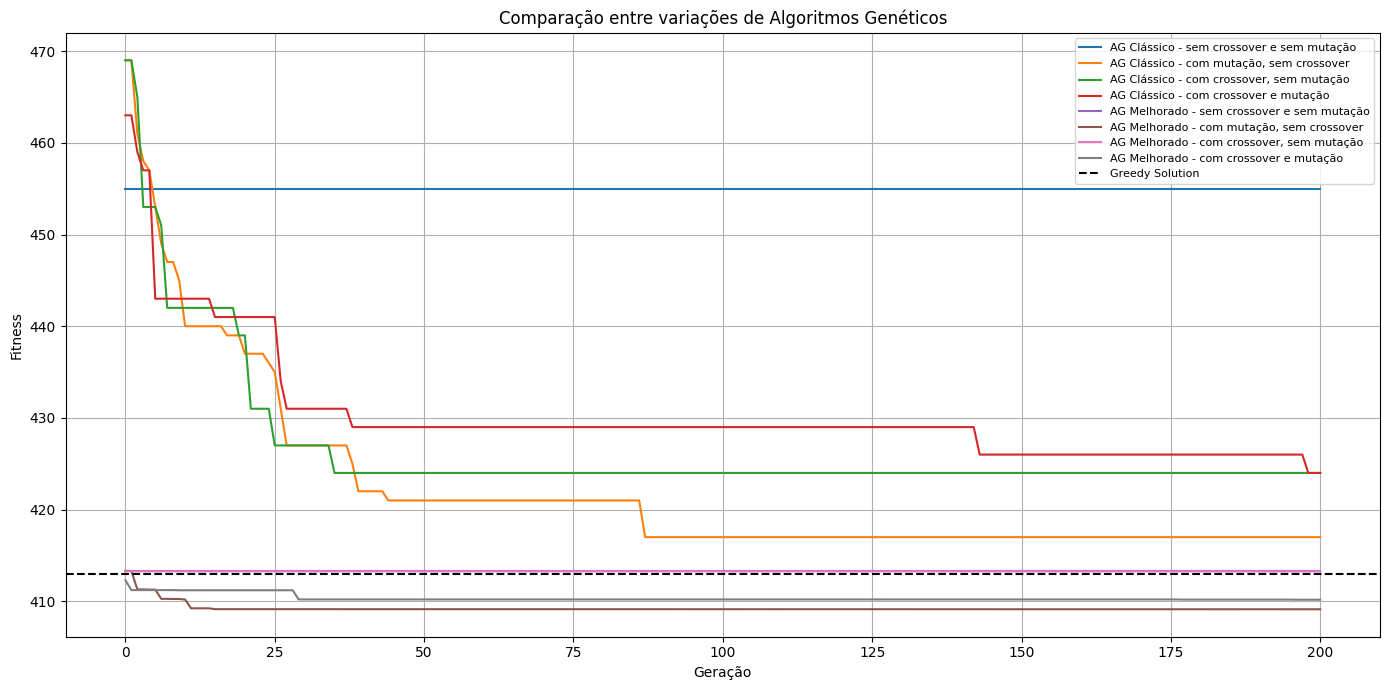

In [10]:
# GRÁFICO COMPARATIVO
plt.figure(figsize=(14, 7))
for nome, dados in resultados.items():
    plt.plot(dados["historico"], label=nome)
plt.axhline(y=fitness_greedy, color='black', linestyle='--', label="Greedy Solution")
plt.xlabel("Geração")
plt.ylabel("Fitness")
plt.title("Comparação entre variações de Algoritmos Genéticos")
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

Streamlit: interface para explorar diferentes parâmetros de entrada utilizando o Algoritmo Genético com cruzamento e mutação.

In [11]:
# Libera a porta 8501
public_url = ngrok.connect(addr="8501", proto="http")
print("URL pública:", public_url)

# Roda o Streamlit em background
!streamlit run ag_interface.py &>/dev/null &


URL pública: NgrokTunnel: "https://75d6a63dbf77.ngrok-free.app" -> "http://localhost:8501"


## **4) Análises e conclusões**

In [12]:
print("ANÁLISE DOS RESULTADOS:")
print("=" * 100)

# Encontrar melhor e pior resultado
fitness_values = [d['fitness'] for d in resultados.values()]
nomes = list(resultados.keys())

melhor_idx = fitness_values.index(min(fitness_values))
pior_idx = fitness_values.index(max(fitness_values))

melhor_nome = nomes[melhor_idx]
pior_nome = nomes[pior_idx]
melhor_fitness = fitness_values[melhor_idx]
pior_fitness = fitness_values[pior_idx]

print(f"-  MELHOR RESULTADO:")
print(f"   {melhor_nome}")
print(f"   Fitness: {melhor_fitness:.2f}")
print("-" * 100)
print(f"-  PIOR RESULTADO:")
print(f"   {pior_nome}")
print(f"   Fitness: {pior_fitness:.2f}")
print("-" * 100)
# Comparação com greedy
melhoria_vs_greedy = ((fitness_greedy - melhor_fitness) / fitness_greedy) * 100
print(f"-  COMPARAÇÃO COM GREEDY SOLUTION:")
print(f"   Greedy: {fitness_greedy:.2f}")
print(f"   Melhor AG: {melhor_fitness:.2f}")
print(f"   Melhoria: {melhoria_vs_greedy:.2f}%")

ANÁLISE DOS RESULTADOS:
-  MELHOR RESULTADO:
   AG Melhorado - com mutação, sem crossover
   Fitness: 409.13
----------------------------------------------------------------------------------------------------
-  PIOR RESULTADO:
   AG Clássico - sem crossover e sem mutação
   Fitness: 455.00
----------------------------------------------------------------------------------------------------
-  COMPARAÇÃO COM GREEDY SOLUTION:
   Greedy: 413.00
   Melhor AG: 409.13
   Melhoria: 0.94%


In [13]:
print(f"CONCLUSÕES:")
print("=" * 100)

# Análise do crossover
if "crossover" in melhor_nome.lower():
    print("(SIM) - Crossover é benéfico para este problema")
else:
    print("(NÃO) - Crossover não mostrou benefícios claros")

# Análise da mutação
if "mutação" in melhor_nome.lower():
    print("(SIM) - Mutação é importante para a evolução")
else:
    print("(NÃO) - Mutação não foi essencial neste caso")

# Análise da versão melhorada
if "melhorado" in melhor_nome.lower():
    print("(SIM) - Função fitness melhorada é superior")
else:
    print("(NÃO) - Versão clássica foi suficiente")

# Comparação com greedy
if melhor_fitness < fitness_greedy:
    print(f"(SIM) - Algoritmo genético superou a solução gulosa em {((fitness_greedy - melhor_fitness) / fitness_greedy * 100):.1f}%")
else:
    print("(NÃO) -Greedy solution foi melhor que o algoritmo genético")

print("=" * 100)

print(f"CONFIGURAÇÃO RECOMENDADA:")
print(f"   {melhor_nome}")
print(f"   Fitness: {melhor_fitness:.2f}")

CONCLUSÕES:
(SIM) - Crossover é benéfico para este problema
(SIM) - Mutação é importante para a evolução
(SIM) - Função fitness melhorada é superior
(SIM) - Algoritmo genético superou a solução gulosa em 0.9%
CONFIGURAÇÃO RECOMENDADA:
   AG Melhorado - com mutação, sem crossover
   Fitness: 409.13
